<h1 align="center">Perceptron</h1>

## Import Libraries

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Activation Function

In [340]:
def step(x):
    return np.where(x >= 0, 1, 0)


def linear(x: np.ndarray):
    return x


def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

## The perceptron using loop through a fixed number of epochs
- Initialize the weights and the bias
- Loop through the epochs
- Loop through the training data
- Calculate the weighted sum of the inputs and the weights
- Apply the activation function
- Update the weights and the bias

In [341]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, act=step):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = act

        self.weights = None
        self.bias = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                y_predicted = self.predict(x_i)

                # Update weights and bias using delta rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X: np.ndarray) -> np.ndarray:
        net = np.dot(X, self.weights) + self.bias
        return self.activation_func(net)

### Products Prediction

#### Initial and clean data
- Read the data from the file `data/prod-train.csv`
- Map the `Type` column to a numerical value
- Split the data into the X and Y 
- Split the data into the training and testing data

In [342]:
prod_train = pd.read_csv("data/prod-train.csv")

In [343]:
type_mappings = {"Chair": 0, "Table": 1, "Bed": 2}

In [344]:
# Feature selection
features = ["Width", "Height"]

# Slipt data into X and Y
X = prod_train[features].values
Y = prod_train["Type"].map(type_mappings).values

In [345]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=69
)

#### Training the Model
- Train the model using the training data
- Plot the loss function

lr=0.01: mse=0.5
lr=0.02: mse=0.5
lr=0.001: mse=0.0
lr=0.002: mse=0.5


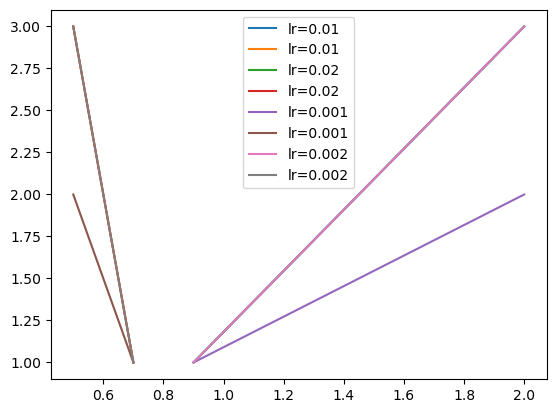

In [346]:
for lr in [0.01, 0.02, 0.001, 0.002]:
    p = Perceptron(learning_rate=lr, n_iters=1000, act=linear)
    p.fit(X_train, y_train)

    y_pred = np.round(p.predict(X_test))

    print(f"lr={lr}: mse={mean_squared_error(y_test, y_pred)}")
    plt.plot(X_test, y_pred, label=f"lr={lr}")

plt.legend()
plt.show()

#### Testing the Model
- Test the model using the testing data from the file `data/prod-test.csv`

In [347]:
p = Perceptron(learning_rate=0.01, n_iters=1000, act=linear)

In [348]:
p.fit(X, Y)

In [349]:
prod_test = pd.read_csv("data/prod-test.csv")

In [350]:
y_pred = np.round(p.predict(prod_test.values))

pd.DataFrame(
    {"Width": prod_test["Width"], "Height": prod_test["Height"], "Type": y_pred}
).replace({v: k for k, v in type_mappings.items()})

,Width,Height,Type
0,0.35,0.35,Chair
1,0.85,0.70,Table
2,1.40,0.45,Bed


## The perceptron using error correction
- Initialize the weights and the bias
- Infinite loop until the error less than a threshold
- Loop through the training data
- Calculate the weighted sum of the inputs and the weights
- Apply the activation function
- Update the weights and the bias
- Update the error

In [351]:
class PerceptronE:
    def __init__(self, learning_rate=0.01, epsilon=0.1, act=step, is_print=True):
        self.lr = learning_rate
        self.epsilon = epsilon
        self.activation_func = act
        self.is_print = is_print

        self.weights = None
        self.bias = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.random.rand(n_features)
        self.bias = 0
        E = 0
        epochs = 0
        while True:
            for idx, x_i in enumerate(X):
                y_predicted = self.predict(x_i)

                # Update weights and bias using delta rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                E += 0.5 * (y[idx] - y_predicted) ** 2
            epochs += 1

            if self.is_print:
                print(f"Epochs {epochs}, E={E}")

            if E < self.epsilon:
                break
            else:
                E = 0

    def predict(self, X: np.ndarray) -> np.ndarray:
        net = np.dot(X, self.weights) + self.bias
        return self.activation_func(net)

### Train the Model

In [352]:
prod_train = pd.read_csv("data/prod-train.csv")

In [353]:
X = prod_train[["Width", "Height"]].values
Y = prod_train["Type"].map(type_mappings).values

In [354]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=69
)

lr=0.01: mse=0.0
lr=0.02: mse=0.0
lr=0.001: mse=0.0
lr=0.002: mse=0.0


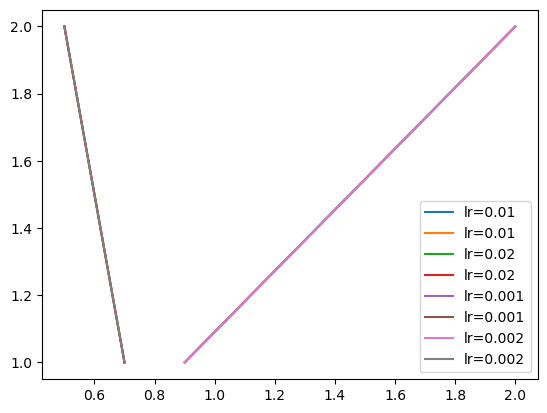

In [355]:
for lr in [0.01, 0.02, 0.001, 0.002]:
    p = PerceptronE(learning_rate=lr, epsilon=0.5, act=linear, is_print=False)
    p.fit(X_train, y_train)

    y_pred = np.round(p.predict(X_test))

    print(f"lr={lr}: mse={mean_squared_error(y_test, y_pred)}")
    plt.plot(X_test, y_pred, label=f"lr={lr}")

plt.legend()
plt.show()

### Test the Model

In [356]:
test = pd.read_csv("data/prod-test.csv")

In [357]:
p = PerceptronE(learning_rate=0.01, epsilon=0.5, act=linear)
p.fit(X, Y)

Epochs 1, E=0.9953803665750861
Epochs 2, E=0.8927755259469494
Epochs 3, E=0.8237166916883285
Epochs 4, E=0.7764399312946673
Epochs 5, E=0.7433083809773295
Epochs 6, E=0.7193690260754736
Epochs 7, E=0.7014130732177658
Epochs 8, E=0.6873644217722225
Epochs 9, E=0.675881850869033
Epochs 10, E=0.6661003778644834
Epochs 11, E=0.6574632153655604
Epochs 12, E=0.6496126828975849
Epochs 13, E=0.6423194629243176
Epochs 14, E=0.6354367812110826
Epochs 15, E=0.6288707764156175
Epochs 16, E=0.6225613756459335
Epochs 17, E=0.6164699802750786
Epochs 18, E=0.6105715603156846
Epochs 19, E=0.6048495978186643
Epochs 20, E=0.599292867598298
Epochs 21, E=0.5938933997612321
Epochs 22, E=0.5886451999233533
Epochs 23, E=0.5835434532154703
Epochs 24, E=0.5785840355902052
Epochs 25, E=0.5737632190301012
Epochs 26, E=0.5690774980503787
Epochs 27, E=0.5645234912157493
Epochs 28, E=0.5600978883387154
Epochs 29, E=0.5557974249043337
Epochs 30, E=0.5516188722210988
Epochs 31, E=0.54755903622266
Epochs 32, E=0.543614

In [358]:
y_pred = np.round(p.predict(prod_test.values))
pd.DataFrame(
    {"Width": prod_test["Width"], "Height": prod_test["Height"], "Type": y_pred}
).replace({v: k for k, v in type_mappings.items()})

,Width,Height,Type
0,0.35,0.35,Chair
1,0.85,0.70,Table
2,1.40,0.45,Bed


## And Gate Prediction

In [359]:
p = Perceptron(learning_rate=0.01, n_iters=1000, act=step)
pe = PerceptronE(learning_rate=0.01, epsilon=0.5, act=step)

In [360]:
prod_train = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
and_gate = pd.DataFrame(prod_train, columns=["X1", "X2", "Y"])

In [361]:
p.fit(and_gate[["X1", "X2"]].values, and_gate["Y"].values)
pe.fit(and_gate[["X1", "X2"]].values, and_gate["Y"].values)

Epochs 1, E=1.5
Epochs 2, E=1.0
Epochs 3, E=1.0
Epochs 4, E=1.0
Epochs 5, E=1.0
Epochs 6, E=1.0
Epochs 7, E=1.0
Epochs 8, E=1.0
Epochs 9, E=1.0
Epochs 10, E=1.0
Epochs 11, E=1.0
Epochs 12, E=1.0
Epochs 13, E=1.0
Epochs 14, E=1.0
Epochs 15, E=1.0
Epochs 16, E=1.0
Epochs 17, E=1.0
Epochs 18, E=1.0
Epochs 19, E=1.0
Epochs 20, E=1.0
Epochs 21, E=0.5
Epochs 22, E=0.5
Epochs 23, E=0.5
Epochs 24, E=0.5
Epochs 25, E=0.5
Epochs 26, E=0.5
Epochs 27, E=0.5
Epochs 28, E=0.5
Epochs 29, E=0.5
Epochs 30, E=0.5
Epochs 31, E=0.5
Epochs 32, E=0.0


In [362]:
y_pred = np.round(p.predict(and_gate[["X1", "X2"]].values))
y_pred_e = np.round(pe.predict(and_gate[["X1", "X2"]].values))

In [363]:
print(f"Perceptron: mse={mean_squared_error(and_gate['Y'], y_pred)}")
print(f"PerceptronE: mse={mean_squared_error(and_gate['Y'], y_pred_e)}")
pd.DataFrame(
    {
        "X1": and_gate["X1"],
        "X2": and_gate["X2"],
        "Y": and_gate["Y"],
        "Y_pred": y_pred,
        "Y_pred_e": y_pred_e,
    }
)

Perceptron: mse=0.0
PerceptronE: mse=0.0


,X1,X2,Y,Y_pred,Y_pred_e
0,0,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,1,1,1,1
